In [1]:
import os
import sys
sys.path.append(os.getcwd())

In [2]:
import wandb
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [3]:
def fetch_influence_tensor(project, run_id):
    eigenvalues_artifact = wandb.Api().artifact(f"wlp9800-new-york-university/{project}/run-{run_id}-outer_influence_tensor:v0")
    artifact_dir = eigenvalues_artifact.download()
    
    with open(f"{artifact_dir}/outer_influence_tensor.table.json") as file:
        json_dict = json.load(file)
    
    df = pd.DataFrame(json_dict["data"], columns=json_dict["columns"])
    return df.to_numpy()

def fetch_immediate_influence_tensor(project, run_id):
    eigenvalues_artifact = wandb.Api().artifact(f"wlp9800-new-york-university/{project}/run-{run_id}-immediate_influence_tensor:v0")
    artifact_dir = eigenvalues_artifact.download()
    
    with open(f"{artifact_dir}/immediate_influence_tensor.table.json") as file:
        json_dict = json.load(file)
    
    df = pd.DataFrame(json_dict["data"], columns=json_dict["columns"])
    return df.to_numpy()


def download_artifacts_in_order(project, run_id):
    api = wandb.Api()
    full_artifact_name = f"wlp9800-new-york-university/{project}/run-{run_id}-hessian"
    artifact_collection = api.artifacts("checkpoint", full_artifact_name)
    artifacts = sorted(artifact_collection, key=lambda x: int(x.version[1:]))
    matrices = []
    for artifact in artifacts:
        print(f"Downloading {artifact.name} (version {artifact.version})...")
        artifact_dir = artifact.download()
        print(f"Downloaded to: {artifact_dir}")
        matrix = np.load(f"{artifact_dir}/run-{run_id}-hessian.npy")
        matrices.append(matrix)
    return np.stack(matrices)

In [4]:
api = wandb.Api()
run_list = [
    ("rnn-test-src", "5e5v2bhe")
]

data = {}
# Download all data first
for project, run_id in run_list:
    run = api.run(f"wlp9800-new-york-university/{project}/{run_id}")
    data[run_id] = {}
    
    # Pre-download the eigenvalues and hyperparameters
    influence = fetch_influence_tensor(project, run.id)
    immediate = fetch_immediate_influence_tensor(project, run.id)
    hessians = download_artifacts_in_order(project, run.id)
    influence = influence[:-1]
    immediate = immediate[1:]
    hessians = hessians[1:] 
    
    # Store the downloaded data
    data[run.id] = {
        "influence": influence,
        "immediate": immediate,
        "hessians": hessians,
        "url": run.url,
    }


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v0


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v1


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v2


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v3


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v4


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v5
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v6


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v7


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v8


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v9
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v10


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v11


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v12


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v13


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v14


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v15


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v16


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v17


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v18
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v19


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v20
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v21


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v22


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v23


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v24
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v25


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v26
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v27


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v28


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v29
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v30


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v31


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v32


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v33


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v34


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v35


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v36


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v37


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v38


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v39
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v40


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v41


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v42


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v43
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v44


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v45


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v46


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v47
Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v48


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v49


wandb:   1 of 1 files downloaded.  


Downloaded to: /home/wlp9800/dev/rnn-test/analyze/artifacts/run-5e5v2bhe-hessian:v50


(50, 1186, 1186)
(50, 1186)
(50, 1186)


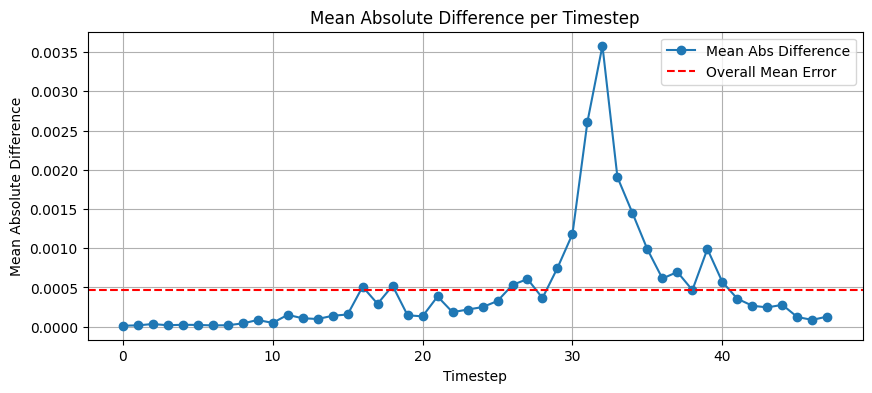

Overall Mean Absolute Error: 0.000474
Overall Max Absolute Error: 0.018845
Equation does not perfectly hold.


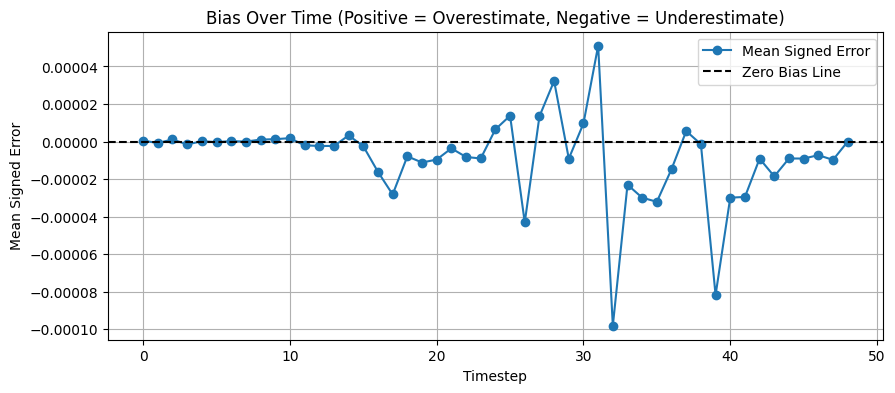

Overall Bias (Mean Signed Error): -0.000009


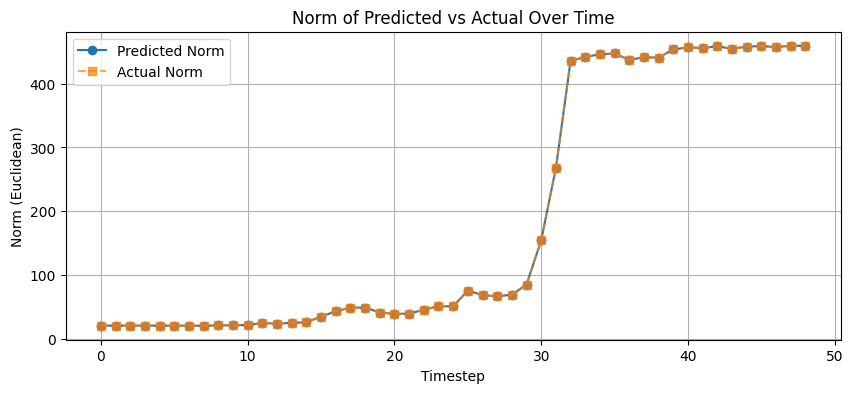

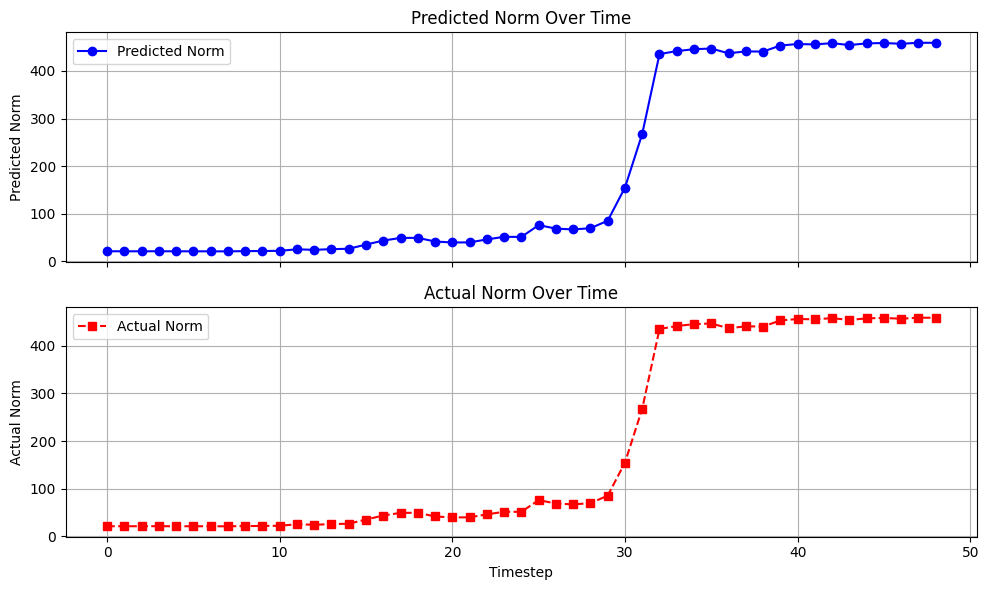

In [13]:
# Extract variables
influence = data["5e5v2bhe"]["influence"].astype(np.float64)
immediate = data["5e5v2bhe"]["immediate"].astype(np.float64)
hessians = data["5e5v2bhe"]["hessians"].astype(np.float64)

min_timesteps = min(hessians.shape[0], influence.shape[0], immediate.shape[0])  

hessians = hessians[:min_timesteps]  
influence = influence[:min_timesteps] 
immediate = immediate[:min_timesteps]

print(hessians.shape)
print(influence.shape)
print(immediate.shape)


# x_predicted = np.zeros_like(immediate[:-1])
# for t in range(len(hessians) - 1):
#     x_predicted[t] = hessians[t] @ influence[t] + immediate[t]


# Compute predicted x_{t+1}
x_predicted = np.einsum('tij,tj->ti', hessians[:-1], influence[:-1]) + immediate[:-1]

# x_predicted = np.zeros_like(influence)
# x_predicted[0] = influence[0]
# x_t = influence[0]

# # Recursively compute x_t+1
# for t in range(1, len(hessians)):
#     x_t = hessians[t-1] @ x_t + immediate[t-1]
#     x_predicted[t] = x_t

# Get actual x_{t+1}
x_actual = influence[1:]

# Compute absolute differences
abs_diff = np.abs(x_predicted[:-1] - x_actual[:-1])  # Shape (49, 1186)

# Aggregate error metrics
mean_abs_diff_per_timestep = np.mean(abs_diff, axis=1)  # Mean error per timestep
overall_mean_error = np.mean(abs_diff)  # Mean over all values
overall_max_error = np.max(abs_diff)  # Maximum absolute error

# Plot mean absolute difference per timestep
plt.figure(figsize=(10, 4))
plt.plot(mean_abs_diff_per_timestep, marker='o', linestyle='-', label="Mean Abs Difference")
plt.axhline(y=overall_mean_error, color='r', linestyle='--', label="Overall Mean Error")
plt.xlabel("Timestep")
plt.ylabel("Mean Absolute Difference")
plt.title("Mean Absolute Difference per Timestep")
plt.legend()
plt.grid()
plt.show()

# Print key error values
print(f"Overall Mean Absolute Error: {overall_mean_error:.6f}")
print(f"Overall Max Absolute Error: {overall_max_error:.6f}")

# Optional: Check if equation holds within tolerance
tolerance = 1e-6
if np.all(abs_diff < tolerance):
    print("Equation holds within tolerance.")
else:
    print("Equation does not perfectly hold.")


# Compute signed error
signed_errors = x_predicted - x_actual  # Same shape as influence

# Compute mean signed error per timestep
mean_signed_error_per_timestep = np.mean(signed_errors, axis=1)

# Overall bias (mean signed error across all timesteps)
overall_bias = np.mean(signed_errors)

# Plot signed errors
plt.figure(figsize=(10, 4))
plt.plot(mean_signed_error_per_timestep, marker='o', linestyle='-', label="Mean Signed Error")
plt.axhline(y=0, color='k', linestyle='--', label="Zero Bias Line")
plt.xlabel("Timestep")
plt.ylabel("Mean Signed Error")
plt.title("Bias Over Time (Positive = Overestimate, Negative = Underestimate)")
plt.legend()
plt.grid()
plt.show()

# Print key bias values
print(f"Overall Bias (Mean Signed Error): {overall_bias:.6f}")


# Compute the Euclidean norm (L2 norm) for each timestep
norm_predicted = np.linalg.norm(x_predicted, axis=1)
norm_actual = np.linalg.norm(x_actual, axis=1)

# Plot norms over time
plt.figure(figsize=(10, 4))
plt.plot(norm_predicted, marker='o', linestyle='-', label="Predicted Norm")
plt.plot(norm_actual, marker='s', linestyle='--', label="Actual Norm", alpha=0.7)
plt.xlabel("Timestep")
plt.ylabel("Norm (Euclidean)")
plt.title("Norm of Predicted vs Actual Over Time")
plt.legend()
plt.grid()
plt.show()



# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot Predicted Norm
axes[0].plot(norm_predicted, marker='o', linestyle='-', color='b', label="Predicted Norm")
axes[0].set_ylabel("Predicted Norm")
axes[0].set_title("Predicted Norm Over Time")
axes[0].grid()
axes[0].legend()

# Plot Actual Norm
axes[1].plot(norm_actual, marker='s', linestyle='--', color='r', label="Actual Norm")
axes[1].set_ylabel("Actual Norm")
axes[1].set_xlabel("Timestep")
axes[1].set_title("Actual Norm Over Time")
axes[1].grid()
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

(50, 1186, 1186)
(50, 1186)
(50, 1186)


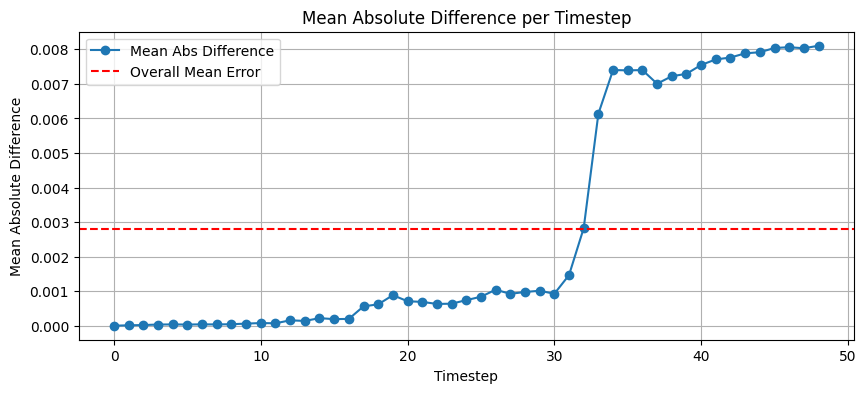

Overall Mean Absolute Error: 0.002811
Overall Max Absolute Error: 0.048955
Equation does not perfectly hold.


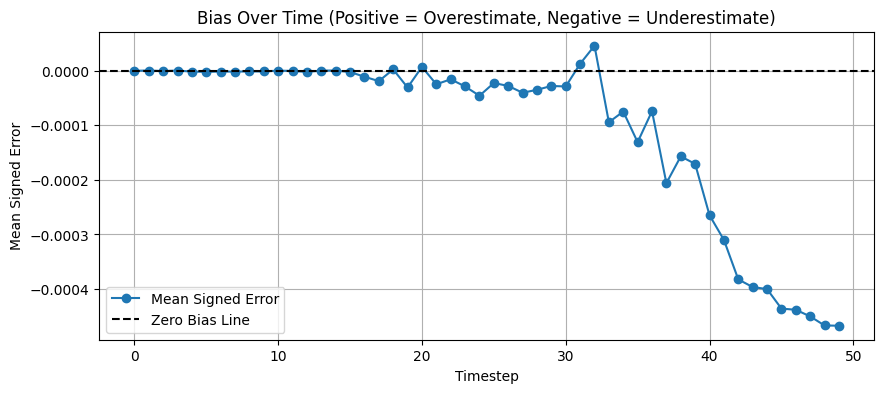

Overall Bias (Mean Signed Error): -0.000104


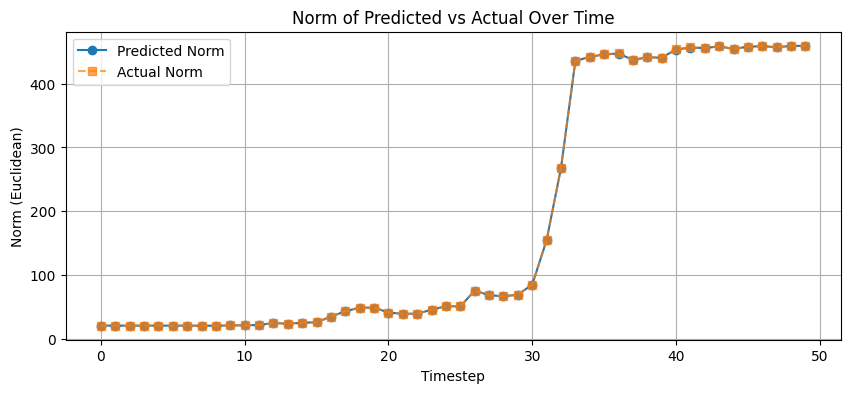

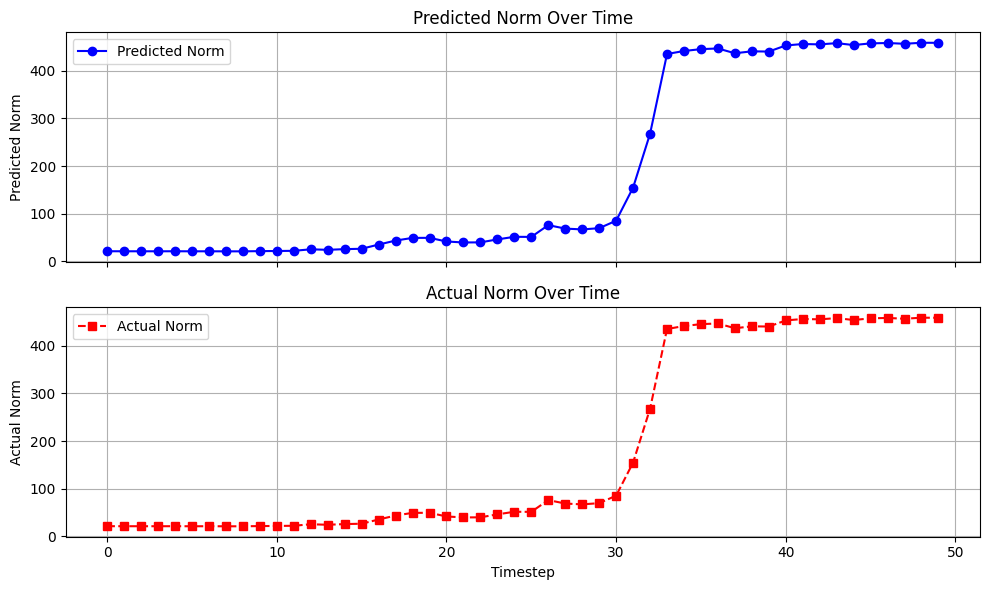

In [12]:
# Extract variables
influence = data["5e5v2bhe"]["influence"].astype(np.float64)
immediate = data["5e5v2bhe"]["immediate"].astype(np.float64)
hessians = data["5e5v2bhe"]["hessians"].astype(np.float64)

min_timesteps = min(hessians.shape[0], influence.shape[0], immediate.shape[0])  

hessians = hessians[:min_timesteps]  
influence = influence[:min_timesteps] 
immediate = immediate[:min_timesteps]

print(hessians.shape)
print(influence.shape)
print(immediate.shape)


# x_predicted = np.zeros_like(immediate[:-1])
# for t in range(len(hessians) - 1):
#     x_predicted[t] = hessians[t] @ influence[t] + immediate[t]


# Compute predicted x_{t+1}
# x_predicted = np.einsum('tij,tj->ti', hessians[:-1], influence[:-1]) + immediate[:-1]

x_predicted = np.zeros_like(influence)
x_predicted[0] = influence[0]
x_t = influence[0]

# Recursively compute x_t+1
for t in range(1, len(hessians)):
    x_t = hessians[t-1] @ x_t + immediate[t-1]
    x_predicted[t] = x_t

# Get actual x_{t+1}
x_actual = influence

# Compute absolute differences
abs_diff = np.abs(x_predicted[:-1] - x_actual[:-1])  # Shape (49, 1186)

# Aggregate error metrics
mean_abs_diff_per_timestep = np.mean(abs_diff, axis=1)  # Mean error per timestep
overall_mean_error = np.mean(abs_diff)  # Mean over all values
overall_max_error = np.max(abs_diff)  # Maximum absolute error

# Plot mean absolute difference per timestep
plt.figure(figsize=(10, 4))
plt.plot(mean_abs_diff_per_timestep, marker='o', linestyle='-', label="Mean Abs Difference")
plt.axhline(y=overall_mean_error, color='r', linestyle='--', label="Overall Mean Error")
plt.xlabel("Timestep")
plt.ylabel("Mean Absolute Difference")
plt.title("Mean Absolute Difference per Timestep")
plt.legend()
plt.grid()
plt.show()

# Print key error values
print(f"Overall Mean Absolute Error: {overall_mean_error:.6f}")
print(f"Overall Max Absolute Error: {overall_max_error:.6f}")

# Optional: Check if equation holds within tolerance
tolerance = 1e-6
if np.all(abs_diff < tolerance):
    print("Equation holds within tolerance.")
else:
    print("Equation does not perfectly hold.")


# Compute signed error
signed_errors = x_predicted - x_actual  # Same shape as influence

# Compute mean signed error per timestep
mean_signed_error_per_timestep = np.mean(signed_errors, axis=1)

# Overall bias (mean signed error across all timesteps)
overall_bias = np.mean(signed_errors)

# Plot signed errors
plt.figure(figsize=(10, 4))
plt.plot(mean_signed_error_per_timestep, marker='o', linestyle='-', label="Mean Signed Error")
plt.axhline(y=0, color='k', linestyle='--', label="Zero Bias Line")
plt.xlabel("Timestep")
plt.ylabel("Mean Signed Error")
plt.title("Bias Over Time (Positive = Overestimate, Negative = Underestimate)")
plt.legend()
plt.grid()
plt.show()

# Print key bias values
print(f"Overall Bias (Mean Signed Error): {overall_bias:.6f}")


# Compute the Euclidean norm (L2 norm) for each timestep
norm_predicted = np.linalg.norm(x_predicted, axis=1)
norm_actual = np.linalg.norm(x_actual, axis=1)

# Plot norms over time
plt.figure(figsize=(10, 4))
plt.plot(norm_predicted, marker='o', linestyle='-', label="Predicted Norm")
plt.plot(norm_actual, marker='s', linestyle='--', label="Actual Norm", alpha=0.7)
plt.xlabel("Timestep")
plt.ylabel("Norm (Euclidean)")
plt.title("Norm of Predicted vs Actual Over Time")
plt.legend()
plt.grid()
plt.show()



# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot Predicted Norm
axes[0].plot(norm_predicted, marker='o', linestyle='-', color='b', label="Predicted Norm")
axes[0].set_ylabel("Predicted Norm")
axes[0].set_title("Predicted Norm Over Time")
axes[0].grid()
axes[0].legend()

# Plot Actual Norm
axes[1].plot(norm_actual, marker='s', linestyle='--', color='r', label="Actual Norm")
axes[1].set_ylabel("Actual Norm")
axes[1].set_xlabel("Timestep")
axes[1].set_title("Actual Norm Over Time")
axes[1].grid()
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [46]:
influence = data["5e5v2bhe"]["influence"]
immediate = data["5e5v2bhe"]["immediate"]
hessians = data["5e5v2bhe"]["hessians"]

min_timesteps = min(hessians.shape[0], influence.shape[0], immediate.shape[0])  

hessians = hessians[:min_timesteps]  
influence = influence[:min_timesteps] 
immediate = immediate[:min_timesteps]

window_size = 3


In [47]:
def compute_ftle(state_trajectory, transition_matrices, window_size):
    ftle_values = np.zeros(len(state_trajectory) - window_size)
    for t in range(len(state_trajectory) - window_size):
        phi_k = np.eye(state_trajectory.shape[1])
        for i in range(window_size):
            phi_k = np.dot(transition_matrices[t + i], phi_k)
        ftle_values[t] = (1 / window_size) * np.log(np.linalg.norm(phi_k @ state_trajectory[t]))
    return ftle_values

def compute_alignment(state_trajectory, transition_matrices, window_size):
    alignment_values = np.zeros(len(state_trajectory) - window_size)

    for t in range(len(state_trajectory) - window_size):
        # Compute Φ_k (the accumulated transition effect over the window)
        phi_k = np.eye(state_trajectory.shape[1])
        for i in range(window_size):
            phi_k = np.dot(transition_matrices[t + i], phi_k)

        # Compute the eigenvectors and eigenvalues of Φ_k (not just A_t!)
        eigvals, eigvecs = np.linalg.eig(phi_k)

        # Explosive subspace: eigenvectors corresponding to eigenvalues |λ| > 1
        explosive_subspace = eigvecs[:, np.abs(eigvals) > 1]

        if explosive_subspace.size == 0:  # If no explosive eigenvectors, alignment is 0
            alignment_values[t] = 0
        else:
            # Project x_t onto the explosive subspace and compute alignment
            x_proj = explosive_subspace @ np.linalg.pinv(explosive_subspace) @ state_trajectory[t]
            alignment_values[t] = np.linalg.norm(x_proj) / np.linalg.norm(state_trajectory[t])

    return alignment_values


def compute_forcing_contribution(external_forcing, transition_matrices, window_size):
    forcing_contributions = np.zeros(len(external_forcing) - window_size)
    for t in range(len(external_forcing) - window_size):
        accumulated_forcing = np.zeros_like(external_forcing[0])
        phi_j = np.eye(external_forcing.shape[1])
        for j in range(window_size):
            accumulated_forcing += phi_j @ external_forcing[t + window_size - 1 - j]
            phi_j = transition_matrices[t + j] @ phi_j
        forcing_contributions[t] = np.linalg.norm(accumulated_forcing)
    return forcing_contributions

def compute_alignment_change(state_trajectory, transition_matrices, window_size):
    alignment_pre = np.zeros(len(state_trajectory) - window_size)
    alignment_post = np.zeros(len(state_trajectory) - window_size)

    for t in range(len(state_trajectory) - window_size):
        # Compute Φ_k (accumulated transition over the window)
        phi_k = np.eye(state_trajectory.shape[1])
        for i in range(window_size):
            phi_k = np.dot(transition_matrices[t + i], phi_k)

        # Get eigenvectors corresponding to explosive eigenvalues
        eigvals, eigvecs = np.linalg.eig(phi_k)
        explosive_subspace = eigvecs[:, np.abs(eigvals) > 1]

        if explosive_subspace.size == 0:
            alignment_pre[t] = 0
            alignment_post[t] = 0
        else:
            # Compute alignment *before* applying b_t
            x_pre = transition_matrices[t] @ state_trajectory[t]
            x_proj_pre = explosive_subspace @ np.linalg.pinv(explosive_subspace) @ x_pre
            alignment_pre[t] = np.linalg.norm(x_proj_pre) / np.linalg.norm(x_pre)

            # Compute alignment *after* b_t is added
            x_post = state_trajectory[t + 1]
            x_proj_post = explosive_subspace @ np.linalg.pinv(explosive_subspace) @ x_post
            alignment_post[t] = np.linalg.norm(x_proj_post) / np.linalg.norm(x_post)

    return alignment_pre, alignment_post


def compute_angle_change(state_trajectory):
    angle_changes = np.zeros(len(state_trajectory) - 1)
    for t in range(len(state_trajectory) - 1):
        dot_product = np.dot(state_trajectory[t], state_trajectory[t + 1])
        angle_changes[t] = np.arccos(dot_product / (np.linalg.norm(state_trajectory[t]) * np.linalg.norm(state_trajectory[t + 1])))
    return angle_changes

In [48]:
ftle_values = compute_ftle(influence, hessians, window_size)
alignment_values = compute_alignment(influence, hessians, window_size)
forcing_contributions = compute_forcing_contribution(immediate, hessians, window_size)
alignment_pre, alignment_post = compute_alignment_change(influence, hessians, window_size)
angle_changes = compute_angle_change(influence)

# # Plot results
# time = np.arange(len(ftle_values))
# plt.figure(figsize=(12, 8))

# plt.subplot(3, 2, 1)
# plt.plot(time, ftle_values, label="FTLE")
# plt.title("Finite-Time Lyapunov Exponent")
# plt.legend()

# plt.subplot(3, 2, 2)
# plt.plot(time, alignment_values[:-window_size], label="Alignment A_t")
# plt.title("Alignment with Explosive Subspace")
# plt.legend()

# plt.subplot(3, 2, 3)
# plt.plot(time, forcing_contributions, label="Forcing Contribution B_t(k)")
# plt.title("Forcing Contribution")
# plt.legend()

# plt.subplot(3, 2, 4)
# plt.plot(time[:-1], alignment_pre, label="A_pre")
# plt.plot(time[:-1], alignment_post, label="A_post", linestyle='dashed')
# plt.title("Alignment Before and After b_t")
# plt.legend()

# plt.subplot(3, 2, 5)
# plt.plot(time[:-1], angle_changes, label="Theta_t")
# plt.title("Angle Change Over Time")
# plt.legend()

# plt.tight_layout()
# plt.show()


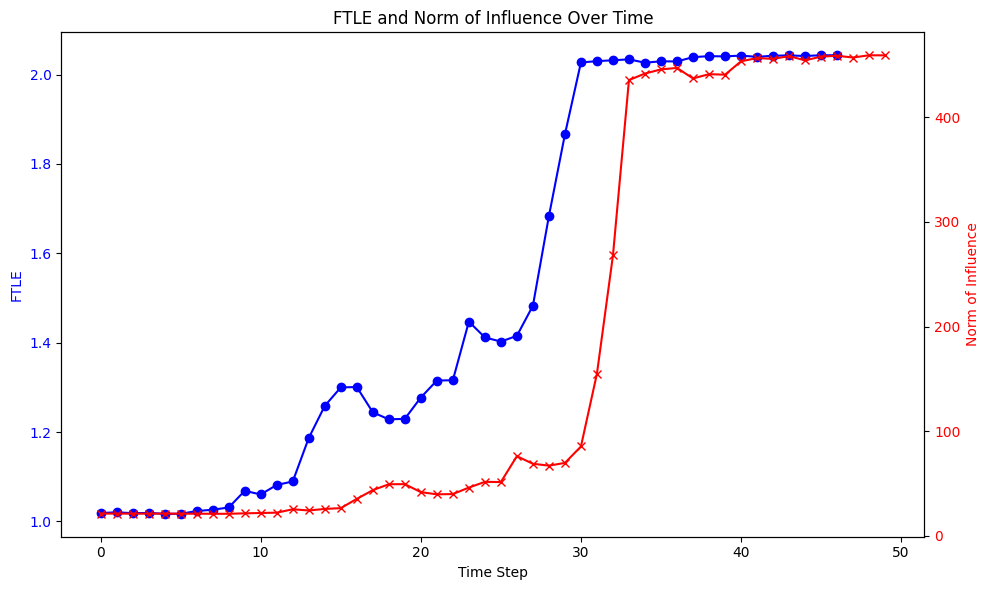

In [49]:
# Calculate the norm of influence at each time step
norm_influence = np.linalg.norm(influence, axis=1)

# Create the plot with both FTLE and norm of influence
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot FTLE values on the first y-axis
ax1.plot(np.arange(len(ftle_values)), ftle_values, "o-", label="FTLE", color='b')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('FTLE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the norm of influence
ax2 = ax1.twinx()
ax2.plot(np.arange(len(norm_influence)), norm_influence, "x-", label="Norm of Influence", color='r')
ax2.set_ylabel('Norm of Influence', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legends
plt.title("FTLE and Norm of Influence Over Time")
fig.tight_layout()
plt.show()


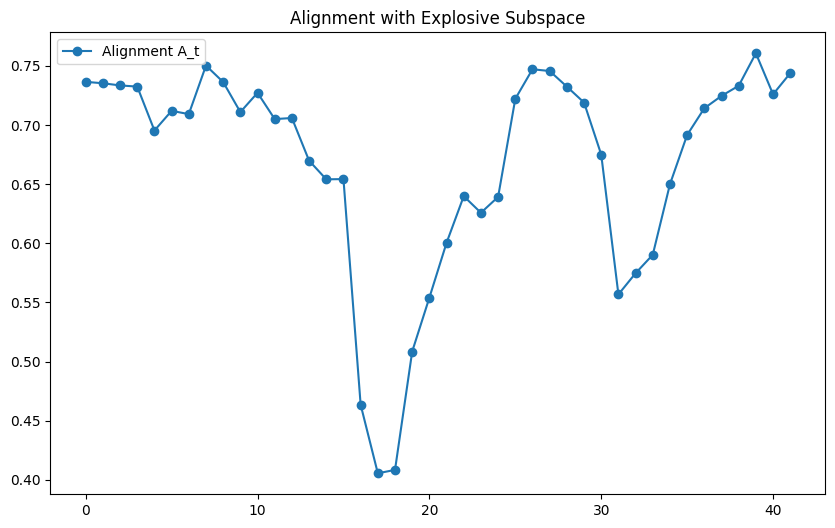

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(alignment_values[:-window_size])), alignment_values[:-window_size], "o-", label="Alignment A_t")
plt.title("Alignment with Explosive Subspace")
plt.legend()
plt.show()

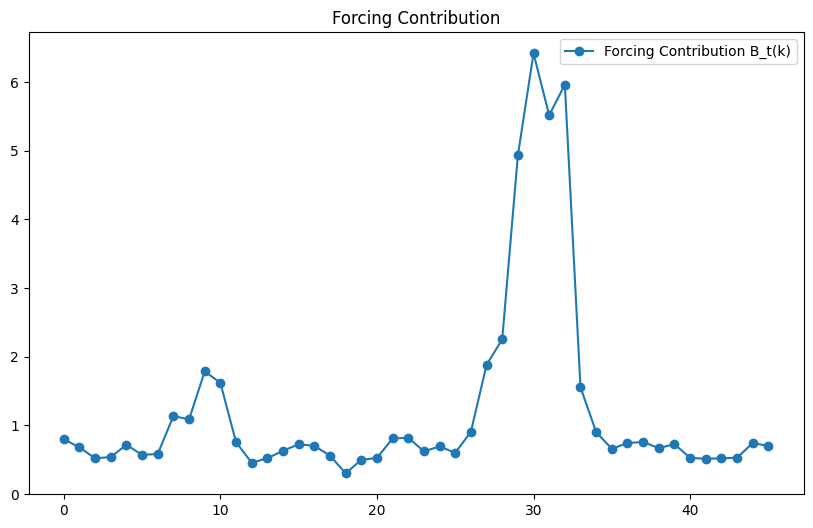

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(forcing_contributions)), forcing_contributions, "o-", label="Forcing Contribution B_t(k)")
plt.title("Forcing Contribution")
plt.legend()
plt.show()

/tmp/ipykernel_703/230273131.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(np.arange(len(alignment_post)), alignment_post, "o-", label="A_post", linestyle='dashed')


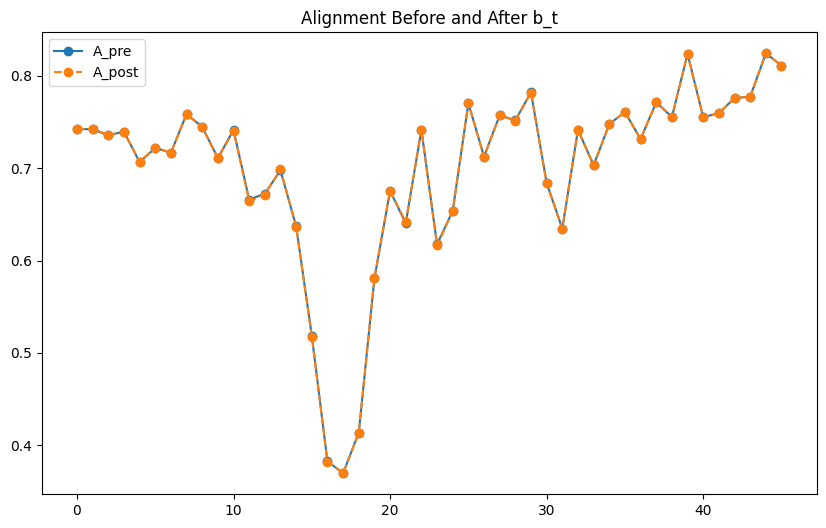

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(alignment_pre)), alignment_pre, "o-", label="A_pre")
plt.plot(np.arange(len(alignment_post)), alignment_post, "o-", label="A_post", linestyle='dashed')
plt.title("Alignment Before and After b_t")
plt.legend()
plt.show()

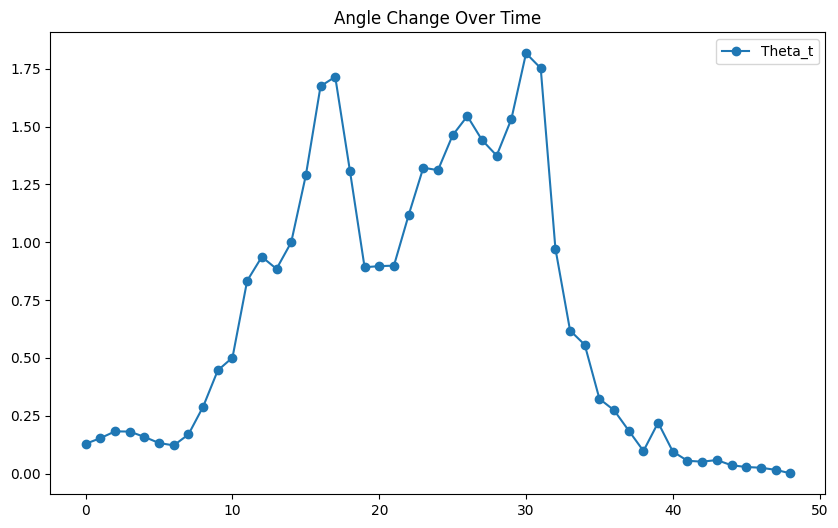

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(angle_changes)), angle_changes, "o-", label="Theta_t")
plt.title("Angle Change Over Time")
plt.legend()
plt.show()